In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DMaturity/digital_maturity_dataset.csv')
df.head()


,organization_id,dimension,sub_area,value,weight
0,1,Strategy,Vision & Leadership,5,0.20
1,1,Customer Experience,Digital Channels,1,0.15
2,1,Technology,Cloud & Infrastructure,5,0.20
3,1,Data & AI,Data Governance,5,0.20
4,1,People & Culture,Skills & Adoption,5,0.15


**D1 - Digital Maturity Framework**

In [16]:
# Load pre-scored digital maturity dataset
df = pd.read_csv('/content/drive/MyDrive/DMaturity/digital_maturity_dataset.csv')

print("Raw dataset preview:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nBasic stats:")
display(df.describe())

print("\nDimensions:", df['dimension'].unique())
print("Sample Sub Areas:", df['sub_area'].unique()[:10])

Raw dataset preview:


,organization_id,dimension,sub_area,value,weight
0,1,Strategy,Vision & Leadership,5,0.20
1,1,Customer Experience,Digital Channels,1,0.15
2,1,Technology,Cloud & Infrastructure,5,0.20
3,1,Data & AI,Data Governance,5,0.20
4,1,People & Culture,Skills & Adoption,5,0.15



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   organization_id  1200 non-null   int64  
 1   dimension        1200 non-null   object 
 2   sub_area         1200 non-null   object 
 3   value            1200 non-null   int64  
 4   weight           1200 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 47.0+ KB

Basic stats:


,organization_id,value,weight
count,1200.000000,1200.000000,1200.000000
mean,100.500000,2.968333,0.166667
std,57.758376,1.441896,0.037283
min,1.000000,1.000000,0.100000
25%,50.750000,2.000000,0.150000
50%,100.500000,3.000000,0.175000
75%,150.250000,4.000000,0.200000
max,200.000000,5.000000,0.200000



Dimensions: ['Strategy' 'Customer Experience' 'Technology' 'Data & AI'
 'People & Culture' 'Operations']
Sample Sub Areas: ['Vision & Leadership' 'Digital Channels' 'Cloud & Infrastructure'
 'Data Governance' 'Skills & Adoption' 'Process Automation']


In [17]:
# -----------------------------------------------------------
# D1 – FRAMEWORK
# Digital Maturity Framework definition + validation
# -----------------------------------------------------------

# 1. Define the conceptual framework in code
#    (Dimensions, sub-areas, default weights, score scale)

DIGITAL_MATURITY_FRAMEWORK = {
    "Strategy": {
        "Vision & Leadership": 0.20,
        "Digital Roadmap": 0.20,
        "Investment & Funding": 0.20,
        "Governance & KPIs": 0.20,
        "Innovation & Experimentation": 0.20,
    },
    "Customer Experience": {
        "Digital Channels": 0.15,
        "Customer Journey": 0.20,
        "Personalization": 0.25,
        "Service Quality": 0.20,
        "Feedback & Insights": 0.20,
    },
    "Technology": {
        "Cloud & Infrastructure": 0.20,
        "Applications & Platforms": 0.20,
        "Cybersecurity": 0.20,
        "Integration & APIs": 0.20,
        "Scalability & Reliability": 0.20,
    },
    "Data & AI": {
        "Data Governance": 0.20,
        "Data Quality": 0.20,
        "Analytics & BI": 0.20,
        "AI & Automation": 0.20,
        "Data Culture": 0.20,
    },
    "People & Culture": {
        "Skills & Adoption": 0.15,
        "Leadership Mindset": 0.20,
        "Change Management": 0.20,
        "Agile Ways of Working": 0.20,
        "Collaboration & Communication": 0.25,
    },
    "Operations": {
        "Process Automation": 0.20,
        "Standardization": 0.20,
        "End-to-End Visibility": 0.20,
        "Performance Management": 0.20,
        "Risk & Compliance": 0.20,
    }
}

LIKERT_SCALE_MIN = 1
LIKERT_SCALE_MAX = 5
MATURITY_BANDS = {
    "Initial": (1.0, 2.0),
    "Developing": (2.0, 3.0),
    "Established": (3.0, 4.0),
    "Advanced": (4.0, 5.0),
}


In [18]:
print("\nD1 – Digital Maturity Framework (Dimensions and Sub-Areas):")
for dim, subareas in DIGITAL_MATURITY_FRAMEWORK.items():
    print(f"\nDimension: {dim}")
    for sa, w in subareas.items():
        print(f"  - {sa} (default weight: {w})")



D1 – Digital Maturity Framework (Dimensions and Sub-Areas):

Dimension: Strategy
  - Vision & Leadership (default weight: 0.2)
  - Digital Roadmap (default weight: 0.2)
  - Investment & Funding (default weight: 0.2)
  - Governance & KPIs (default weight: 0.2)
  - Innovation & Experimentation (default weight: 0.2)

Dimension: Customer Experience
  - Digital Channels (default weight: 0.15)
  - Customer Journey (default weight: 0.2)
  - Personalization (default weight: 0.25)
  - Service Quality (default weight: 0.2)
  - Feedback & Insights (default weight: 0.2)

Dimension: Technology
  - Cloud & Infrastructure (default weight: 0.2)
  - Applications & Platforms (default weight: 0.2)
  - Cybersecurity (default weight: 0.2)
  - Integration & APIs (default weight: 0.2)
  - Scalability & Reliability (default weight: 0.2)

Dimension: Data & AI
  - Data Governance (default weight: 0.2)
  - Data Quality (default weight: 0.2)
  - Analytics & BI (default weight: 0.2)
  - AI & Automation (default w

In [19]:
# 2. Validate that dataset matches framework (sanity check)

dataset_dims = set(df['dimension'].unique())
framework_dims = set(DIGITAL_MATURITY_FRAMEWORK.keys())

print("\nChecking that dataset dimensions match framework:")
print("In dataset but not in framework:", dataset_dims - framework_dims)
print("In framework but not in dataset:", framework_dims - dataset_dims)



Checking that dataset dimensions match framework:
In dataset but not in framework: set()
In framework but not in dataset: set()


In [20]:
# Sub-area validation
dataset_subareas = (
    df[['dimension', 'sub_area']]
    .drop_duplicates()
    .sort_values(['dimension', 'sub_area'])
)

framework_subareas = []
for dim, subareas in DIGITAL_MATURITY_FRAMEWORK.items():
    for sa in subareas.keys():
        framework_subareas.append((dim, sa))
framework_subareas = pd.DataFrame(framework_subareas, columns=['dimension', 'sub_area'])

print("\nSample of dataset sub-areas:")
display(dataset_subareas.head(15))

print("\nSample of framework sub-areas:")
display(framework_subareas.head(15))



Sample of dataset sub-areas:


,dimension,sub_area
1,Customer Experience,Digital Channels
3,Data & AI,Data Governance
5,Operations,Process Automation
4,People & Culture,Skills & Adoption
0,Strategy,Vision & Leadership
2,Technology,Cloud & Infrastructure



Sample of framework sub-areas:


,dimension,sub_area
0,Strategy,Vision & Leadership
1,Strategy,Digital Roadmap
2,Strategy,Investment & Funding
3,Strategy,Governance & KPIs
4,Strategy,Innovation & Experimentation
5,Customer Experience,Digital Channels
6,Customer Experience,Customer Journey
7,Customer Experience,Personalization
8,Customer Experience,Service Quality
9,Customer Experience,Feedback & Insights


**D2 - Survey Creation**

In [21]:
# -----------------------------------------------------------
# D2 – SURVEY LAYER
# Define survey items + template + transformation from responses
# -----------------------------------------------------------

# 1. Build survey item catalogue from the framework
#    (Each sub-area corresponds to one or more survey questions)

survey_items = []

q_counter = 1
for dim, subareas in DIGITAL_MATURITY_FRAMEWORK.items():
    for sa, w in subareas.items():
        question_id = f"Q{q_counter}"
        question_text = (
            f"On a scale of {LIKERT_SCALE_MIN}–{LIKERT_SCALE_MAX}, "
            f"rate your organization's maturity in '{sa}' under '{dim}'."
        )
        survey_items.append({
            "question_id": question_id,
            "question_text": question_text,
            "dimension": dim,
            "sub_area": sa,
            "default_weight": w,
            "scale_min": LIKERT_SCALE_MIN,
            "scale_max": LIKERT_SCALE_MAX,
        })
        q_counter += 1

survey_items_df = pd.DataFrame(survey_items)
print("\nD2 – Survey Item Catalogue (one row per question):")
display(survey_items_df.head())



D2 – Survey Item Catalogue (one row per question):


,question_id,question_text,dimension,sub_area,default_weight,scale_min,scale_max
0,Q1,"On a scale of 1–5, rate your organization's ma...",Strategy,Vision & Leadership,0.2,1,5
1,Q2,"On a scale of 1–5, rate your organization's ma...",Strategy,Digital Roadmap,0.2,1,5
2,Q3,"On a scale of 1–5, rate your organization's ma...",Strategy,Investment & Funding,0.2,1,5
3,Q4,"On a scale of 1–5, rate your organization's ma...",Strategy,Governance & KPIs,0.2,1,5
4,Q5,"On a scale of 1–5, rate your organization's ma...",Strategy,Innovation & Experimentation,0.2,1,5


In [22]:
# 2. Export a survey template that can be used in Google Forms / Excel
survey_template_path = "/content/digital_maturity_survey_template.csv"
survey_items_df.to_csv(survey_template_path, index=False)
print(f"\nSurvey template saved to: {survey_template_path}")



Survey template saved to: /content/digital_maturity_survey_template.csv


In [23]:
import numpy as np
# 3. Example: Simulate raw survey responses and show
#    how they are transformed into the long format used in df.

#    a) Simulate responses for 5 organizations (for demonstration)
num_orgs_demo = 5
question_cols = survey_items_df['question_id'].tolist()

np.random.seed(42)  # reproducible demo
responses_data = []

for org_id in range(1, num_orgs_demo + 1):
    row = {"organization_id": org_id}
    for q in question_cols:
        # random Likert response
        row[q] = np.random.randint(LIKERT_SCALE_MIN, LIKERT_SCALE_MAX + 1)
    responses_data.append(row)

responses_df = pd.DataFrame(responses_data)
print("\nExample raw survey responses (wide format – one row per org):")
display(responses_df.head())



Example raw survey responses (wide format – one row per org):


,organization_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,1,4,5,3,5,5,2,3,3,3,...,2,5,4,1,1,3,3,2,4,4
1,2,3,4,4,1,3,5,3,5,1,...,4,4,4,5,3,1,4,2,4,2
2,3,2,4,5,2,2,4,2,2,4,...,5,1,5,5,1,1,1,1,4,3
3,4,3,1,3,3,1,3,5,2,2,...,1,3,5,3,1,5,2,3,1,2
4,5,2,4,5,3,1,4,5,4,5,...,1,5,4,4,4,4,4,3,2,4


In [24]:
#    b) Function to transform raw responses to long format
def transform_responses_to_long(responses_df, survey_items_df):
    """
    Convert wide survey responses (one row per organization, Q1..Qn columns)
    into long format: one row per (organization, dimension, sub_area).
    """
    id_col = 'organization_id'
    question_cols = survey_items_df['question_id'].tolist()

    # Melt to long on question_id
    long_df = responses_df.melt(
        id_vars=[id_col],
        value_vars=question_cols,
        var_name='question_id',
        value_name='value'
    )

    # Join with survey metadata
    long_df = long_df.merge(
        survey_items_df[['question_id', 'dimension', 'sub_area', 'default_weight']],
        on='question_id',
        how='left'
    )

    long_df.rename(columns={'default_weight': 'weight'}, inplace=True)

    return long_df[['organization_id', 'dimension', 'sub_area', 'value', 'weight']]

demo_long_df = transform_responses_to_long(responses_df, survey_items_df)

print("\nTransformed survey responses (long format – matches main dataset schema):")
display(demo_long_df.head())


Transformed survey responses (long format – matches main dataset schema):


,organization_id,dimension,sub_area,value,weight
0,1,Strategy,Vision & Leadership,4,0.2
1,2,Strategy,Vision & Leadership,3,0.2
2,3,Strategy,Vision & Leadership,2,0.2
3,4,Strategy,Vision & Leadership,3,0.2
4,5,Strategy,Vision & Leadership,2,0.2


**D3 - Weighted Scoring Model**

/tmp/ipython-input-6403734.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dimension_scores = df.groupby(['organization_id', 'dimension']).apply(


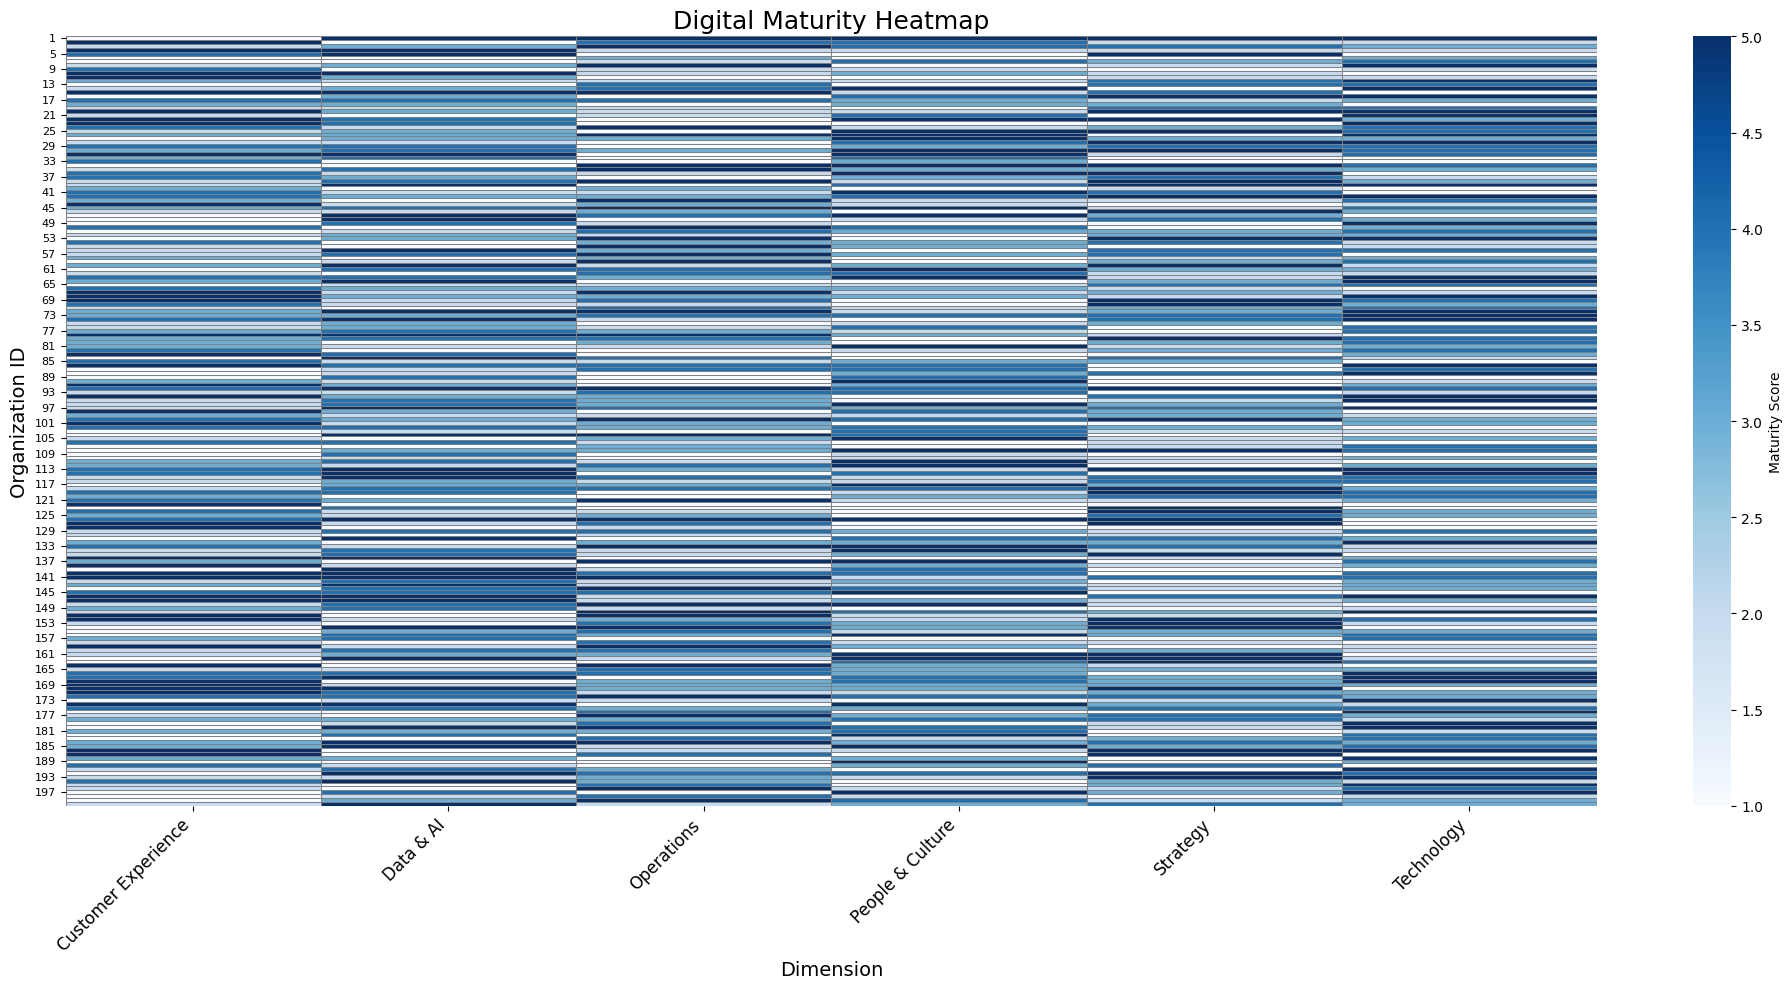

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate weighted score for each sub-area
df['weighted_score'] = df['value'] * df['weight']

# Aggregate to dimension level for each organization
dimension_scores = df.groupby(['organization_id', 'dimension']).apply(
    lambda x: (x['value'] * x['weight']).sum() / x['weight'].sum()
).reset_index(name='weighted_score')

plt.figure(figsize=(20, 10))   # bigger and wider figure

pivot = dimension_scores.pivot(
    index='organization_id',
    columns='dimension',
    values='weighted_score'
)

sns.heatmap(
    pivot,
    cmap='Blues',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Maturity Score'},
    annot=False   # turn off annotation for clarity
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=8)

plt.title("Digital Maturity Heatmap", fontsize=18)
plt.xlabel("Dimension", fontsize=14)
plt.ylabel("Organization ID", fontsize=14)

plt.tight_layout()
plt.show()

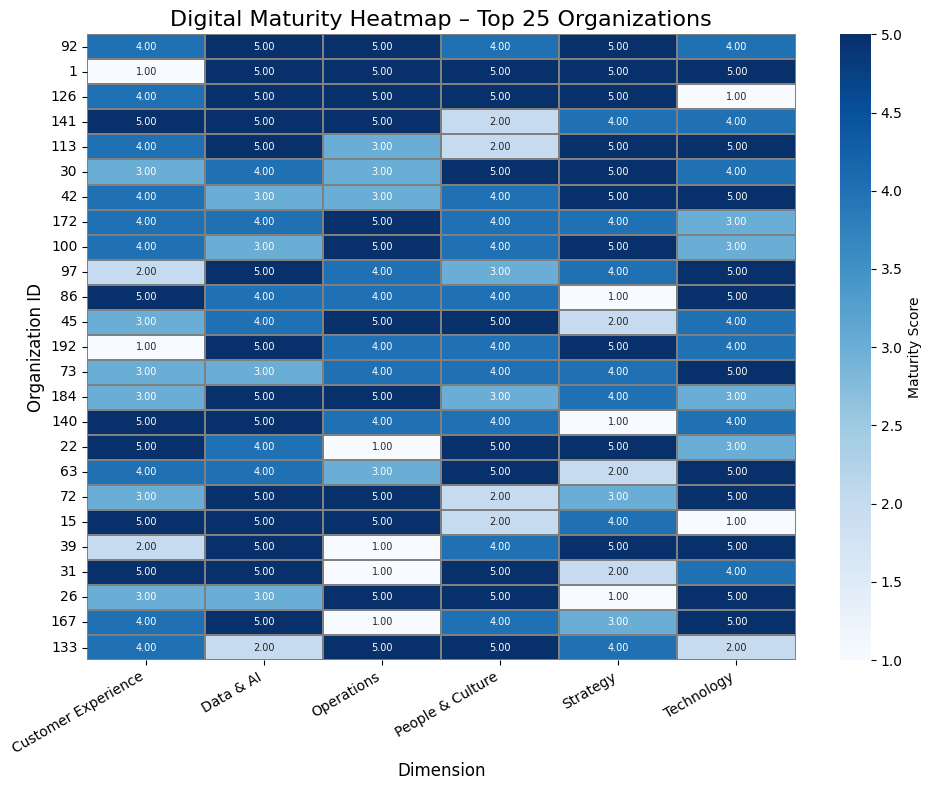

In [27]:
top_n = 25

# Calculate overall maturity score for each organization
overall = dimension_scores.groupby('organization_id')['weighted_score'].mean()

top_org_ids = overall.sort_values(ascending=False).head(top_n).index
pivot_top = pivot.loc[top_org_ids]

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_top,
    cmap='Blues',
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'Maturity Score'},
    annot=True,
    fmt=".2f",
    annot_kws={'size': 7}
)

plt.title(f"Digital Maturity Heatmap – Top {top_n} Organizations", fontsize=16)
plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Organization ID", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [28]:
import plotly.graph_objects as go

org_id = 3  # choose any organization

org_data = dimension_scores[dimension_scores['organization_id'] == org_id]

fig = go.Figure(data=go.Scatterpolar(
    r=org_data['weighted_score'],
    theta=org_data['dimension'],
    fill='toself'
))

fig.update_layout(
    title=f"Digital Maturity Radar Chart – Organization {org_id}",
    polar=dict(radialaxis=dict(visible=True, range=[0, org_data['weighted_score'].max()])),
    showlegend=False
)

fig.show()


**D4 - Analysis Logic**

In [29]:
def recommend(score):
    if score < 0.3:
        return "Critical – Immediate transformation required"
    elif score < 0.5:
        return "Improve – Medium priority upgrade"
    else:
        return "Good – Maintain and optimize"

dimension_scores["recommendation"] = dimension_scores["weighted_score"].apply(recommend)
dimension_scores


,organization_id,dimension,weighted_score,recommendation
0,1,Customer Experience,1.0,Good – Maintain and optimize
1,1,Data & AI,5.0,Good – Maintain and optimize
2,1,Operations,5.0,Good – Maintain and optimize
3,1,People & Culture,5.0,Good – Maintain and optimize
4,1,Strategy,5.0,Good – Maintain and optimize
...,...,...,...,...
1195,200,Data & AI,5.0,Good – Maintain and optimize
1196,200,Operations,2.0,Good – Maintain and optimize
1197,200,People & Culture,3.0,Good – Maintain and optimize
1198,200,Strategy,4.0,Good – Maintain and optimize


**D5 - Road Map Engine**

In [31]:
def action_recommendation(priority_label, dimension, sub_area):
    """Generates actionable roadmap guidance."""
    if priority_label == "Critical":
        return (f"Immediate investment needed in {sub_area}. "
                f"Establish foundational capabilities in {dimension}.")
    elif priority_label == "Improve":
        return (f"Strengthen processes and tools in {sub_area}. "
                f"Plan upgrades within next 6–12 months.")
    else:
        return (f"Maintain performance in {sub_area}. "
                f"Consider optimization or innovation initiatives.")

def priority_label(score):
    if score < 0.30:
        return 'Critical'
    elif score < 0.60:
        return 'Improve'
    else:
        return 'Healthy'

# Add priority category & actions
roadmap_df = df.copy()
roadmap_df['weighted_score'] = roadmap_df['value'] * roadmap_df['weight']
roadmap_df['priority'] = roadmap_df['weighted_score'].apply(priority_label)

# Add action recommendations
roadmap_df['recommended_action'] = roadmap_df.apply(
    lambda row: action_recommendation(row['priority'], row['dimension'], row['sub_area']),
    axis=1
)

# Final Roadmap Table
roadmap_final = roadmap_df[['organization_id', 'dimension', 'sub_area', 'weighted_score',
                            'priority', 'recommended_action']].sort_values(
                                ['organization_id', 'weighted_score']
                            )

print("\nEnhanced Digital Transformation Roadmap:")
display(roadmap_final.head(20))

# Export to CSV
roadmap_final.to_csv("enhanced_digital_transformation_roadmap.csv", index=False)
print("Enhanced roadmap exported as enhanced_digital_transformation_roadmap.csv")



Enhanced Digital Transformation Roadmap:


,organization_id,dimension,sub_area,weighted_score,priority,recommended_action
1,1,Customer Experience,Digital Channels,0.15,Critical,Immediate investment needed in Digital Channel...
5,1,Operations,Process Automation,0.50,Improve,Strengthen processes and tools in Process Auto...
4,1,People & Culture,Skills & Adoption,0.75,Healthy,Maintain performance in Skills & Adoption. Con...
0,1,Strategy,Vision & Leadership,1.00,Healthy,Maintain performance in Vision & Leadership. C...
2,1,Technology,Cloud & Infrastructure,1.00,Healthy,Maintain performance in Cloud & Infrastructure...
3,1,Data & AI,Data Governance,1.00,Healthy,Maintain performance in Data Governance. Consi...
9,2,Data & AI,Data Governance,0.20,Critical,Immediate investment needed in Data Governance...
6,2,Strategy,Vision & Leadership,0.40,Improve,Strengthen processes and tools in Vision & Lea...
8,2,Technology,Cloud & Infrastructure,0.40,Improve,Strengthen processes and tools in Cloud & Infr...
11,2,Operations,Process Automation,0.40,Improve,Strengthen processes and tools in Process Auto...


Enhanced roadmap exported as enhanced_digital_transformation_roadmap.csv


In [32]:
org_id = 3   # change this to any org you want
org_data = dimension_scores[dimension_scores['organization_id'] == org_id].copy()
org_data


,organization_id,dimension,weighted_score,recommendation
12,3,Customer Experience,2.0,Good – Maintain and optimize
13,3,Data & AI,3.0,Good – Maintain and optimize
14,3,Operations,5.0,Good – Maintain and optimize
15,3,People & Culture,4.0,Good – Maintain and optimize
16,3,Strategy,4.0,Good – Maintain and optimize
17,3,Technology,3.0,Good – Maintain and optimize


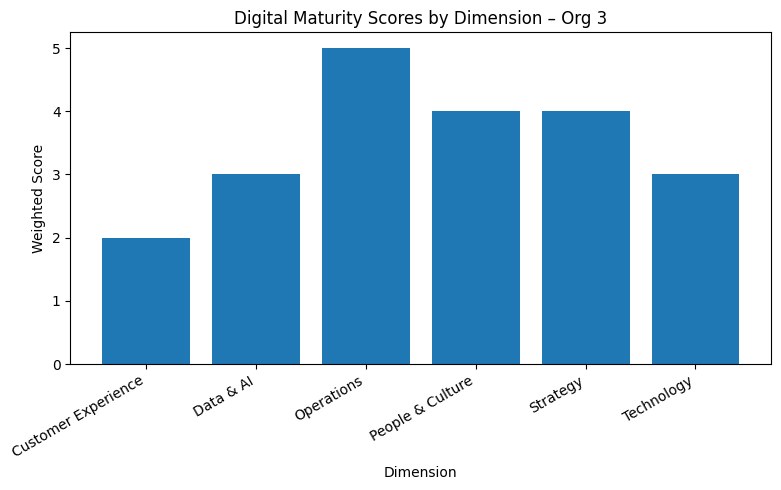

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(org_data['dimension'], org_data['weighted_score'])
plt.title(f"Digital Maturity Scores by Dimension – Org {org_id}")
plt.xlabel("Dimension")
plt.ylabel("Weighted Score")
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


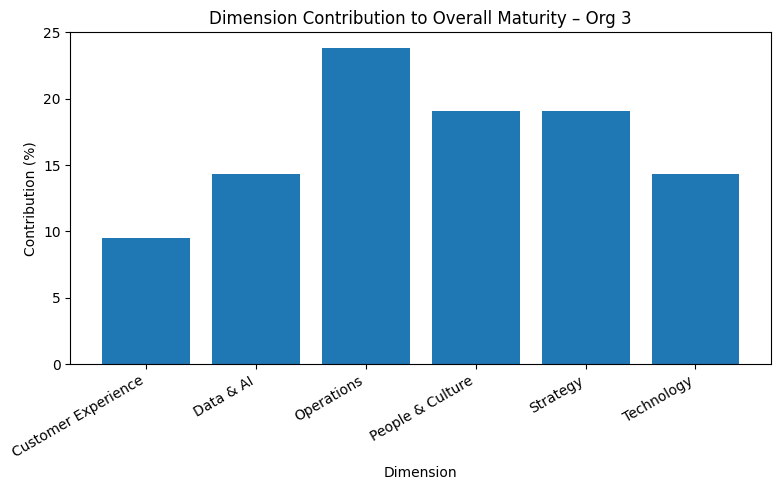

In [34]:
# percentage contribution of each dimension
total_score = org_data['weighted_score'].sum()
org_data['contribution_pct'] = org_data['weighted_score'] / total_score * 100

plt.figure(figsize=(8, 5))

plt.bar(org_data['dimension'], org_data['contribution_pct'])
plt.title(f"Dimension Contribution to Overall Maturity – Org {org_id}")
plt.xlabel("Dimension")
plt.ylabel("Contribution (%)")
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


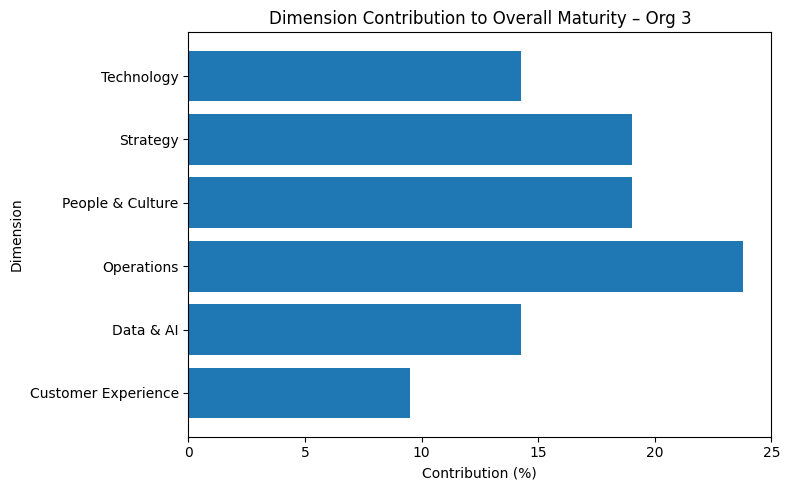

In [35]:
plt.figure(figsize=(8, 5))

plt.barh(org_data['dimension'], org_data['contribution_pct'])
plt.title(f"Dimension Contribution to Overall Maturity – Org {org_id}")
plt.xlabel("Contribution (%)")
plt.ylabel("Dimension")

plt.tight_layout()
plt.show()


In [36]:
def priority_color(score):
    if score < 0.30:
        return 'red'      # Critical
    elif score < 0.60:
        return 'gold'     # Medium
    else:
        return 'green'    # Good

def priority_label(score):
    if score < 0.30:
        return 'Critical'
    elif score < 0.60:
        return 'Improve'
    else:
        return 'Healthy'

org_data['priority_color'] = org_data['weighted_score'].apply(priority_color)
org_data['priority_label'] = org_data['weighted_score'].apply(priority_label)
org_data


,organization_id,dimension,weighted_score,recommendation,contribution_pct,priority_color,priority_label
12,3,Customer Experience,2.0,Good – Maintain and optimize,9.523810,green,Healthy
13,3,Data & AI,3.0,Good – Maintain and optimize,14.285714,green,Healthy
14,3,Operations,5.0,Good – Maintain and optimize,23.809524,green,Healthy
15,3,People & Culture,4.0,Good – Maintain and optimize,19.047619,green,Healthy
16,3,Strategy,4.0,Good – Maintain and optimize,19.047619,green,Healthy
17,3,Technology,3.0,Good – Maintain and optimize,14.285714,green,Healthy


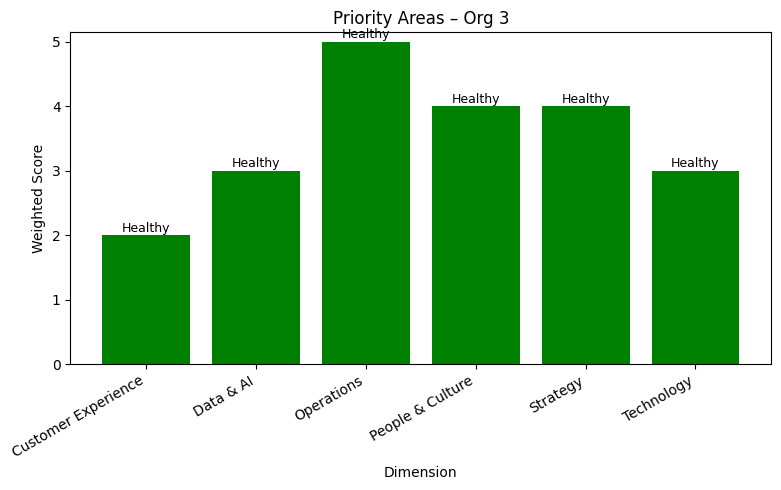

In [37]:
plt.figure(figsize=(8, 5))

plt.bar(org_data['dimension'], org_data['weighted_score'],
        color=org_data['priority_color'])

# add the label text above each bar
for idx, row in org_data.iterrows():
    plt.text(row['dimension'],
             row['weighted_score'] + 0.01,     # a bit above bar
             row['priority_label'],
             ha='center', va='bottom', fontsize=9)

plt.title(f"Priority Areas – Org {org_id}")
plt.xlabel("Dimension")
plt.ylabel("Weighted Score")
plt.xticks(rotation=30, ha='right')

plt.ylim(0, max(org_data['weighted_score']) + 0.15)
plt.tight_layout()
plt.show()
